In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("darkgrid")
sns.set_palette('Set1')

In [2]:
school = pd.read_csv('school.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
school.head(5)

,Unnamed: 0,status,submitter.city,submitter.state,submitter.postal_code,Account.Holder,Grade.Entering,First.choice.school,Second.choice.school,Third.choice.school,Fourth.choice.school,Fifth.choice.school,First.choice.program,Second.choice.program,Third.choice.program,MG.Sports,MG.STEM,MG.STEM.Activities,MG.Activities,Attend.DPSCD,DPSCD.School,Attend.Other,SEM.School,Interests,Cumul.GPA,GPA.Multiplier,Overall.Exam.Score,GPA.Score,Essay.Score,DPSCD.Bonus,Total.App.Score,HHS.Bonus,Assignment,Assignment.Ranked.Choice
0,0,Accepted,Detroit,MI,48221,Parent/Guardian,9,Heritage High School,Pacific High School,Hawking High School,Silverado High School,Eastside High School,"Math, Science and Applied Technology (MSAT)",Computer Information Systems and Commerce (CISC),"Sports Management, Marketing and Medicine",NaN,NaN,NaN,NaN,Yes,Pine Hills,No,NaN,Fine and Performing Arts (music&#44; dance&#44...,3.73610,NaN,39.055924,33.0,20.0,10,102.055924,10,Heritage High School,First
1,1,Accepted,Detroit,MI,48223,Parent/Guardian,9,Pacific High School,Hawking High School,Heritage High School,NaN,NaN,NaN,NaN,NaN,Very important,Very excited,"Robotics,Create products using 3-D printers an...","Robotics,Sports,Dance",Yes,Pine Hills,No,NaN,"Athletics/Sports,Fine and Performing Arts (mus...",3.97060,NaN,32.839648,35.0,20.0,10,97.839648,0,Pacific High School,First
2,2,Accepted,Detroit,MI,48207,Parent/Guardian,9,Hawking High School,Pacific High School,Heritage High School,Eastside High School,Silverado High School,"Math, Science and Applied Technology (MSAT)",Computer Information Systems and Commerce (CISC),"Sports Management, Marketing and Medicine",Very important,Very excited,Graphic design/computer art,"Art Club,Sports,Music production,Social Justic...",Yes,Pine Hills,No,NaN,"Athletics/Sports,Fine and Performing Arts (mus...",3.77775,NaN,32.028559,33.0,20.0,10,95.028559,0,Hawking High School,First
3,3,Accepted,Detroit,MI,48221,Parent/Guardian,9,Pacific High School,Hawking High School,Heritage High School,Eastside High School,Silverado High School,"Math, Science and Applied Technology (MSAT)","Sports Management, Marketing and Medicine",Computer Information Systems and Commerce (CISC),Not so important,Somewhat excited,Create products using 3-D printers and laser e...,"Art Club,Chess Club",Yes,Pine Hills,No,NaN,Other,3.94445,NaN,31.647674,35.0,18.0,10,94.647674,10,Pacific High School,First
4,4,Accepted,Detroit,MI,48221,Parent/Guardian,9,Hawking High School,Pacific High School,Eastside High School,NaN,NaN,"Math, Science and Applied Technology (MSAT)",Computer Information Systems and Commerce (CISC),NaN,NaN,NaN,NaN,NaN,Yes,Pine Hills,No,NaN,"Athletics/Sports,Fine and Performing Arts (mus...",3.80560,NaN,30.901489,34.0,18.0,10,92.901489,10,Hawking High School,First


### EDA (Exploratory Data Analysis) of Applicant Assignment August 2020 dataset

#### Rename data of interest for better readability

In [5]:
school = school.rename(columns={'status':'Application Status', 'Attend.DPSCD': 'Current DPSCD Student', 'First.choice.school': 'Top Ranked Examination High School', 'Second.choice.school': 'Second Ranked Examination High School',
                      'Third.choice.school': 'Third Ranked Examination High School','Fourth.choice.school': 'Fourth Ranked Examination High School'
                      ,'Fifth.choice.school': 'Fifth Ranked Examination High School', 'submitter.city':'Applicant City of Residence', 'submitter.state':'Applicant State of Residence'
                        ,'Assignment.Ranked.Choice':'Rank of Applicants Final Placement'})
school['Current DPSCD Student'] = school['Current DPSCD Student'].replace({'Yes': 'DPSCD Applicant', 'No': 'Non-DPSCD Applicant'})
school['Assignment'] = school['Assignment'].replace({'None': 'No Placement Made'})
school['Rank of Applicants Final Placement'] = school['Rank of Applicants Final Placement'].replace({'None': 'No Placement Made'})

### What is the realtive frequency of applcation status?

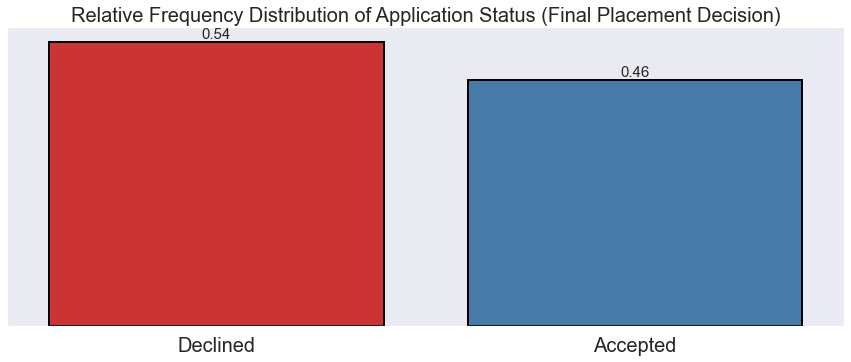

In [6]:
plt.figure(figsize=(15, 5.5))
total = float(len(school['Application Status']))
status = sns.countplot(x=school['Application Status'], data=school, edgecolor='black', linewidth=2, order = school['Application Status'].value_counts().index)
for p in status.patches:
    height = p.get_height()
    status.tick_params(labelsize=20)
    status.set_ylabel('')
    status.set_xlabel('')
    status.set_yticks([])
    status.axes.set_title("Relative Frequency Distribution of Application Status (Final Placement Decision)",fontsize=20)
    plt.xticks(fontsize=20)
    status.text(p.get_x()+p.get_width()/2.,
            height + 8,
            '{:1.2}'.format(height/total),
            ha="center", fontsize=15) 

## How many applicants were assigned to each school?

In [7]:
school.Assignment.value_counts()

No Placement Made        622
Hawking High School      274
Pacific High School      111
Eastside High School      83
Silverado High School     41
Heritage High School      29
Name: Assignment, dtype: int64

Extract a dataframe of the target data and export to CSV for later use

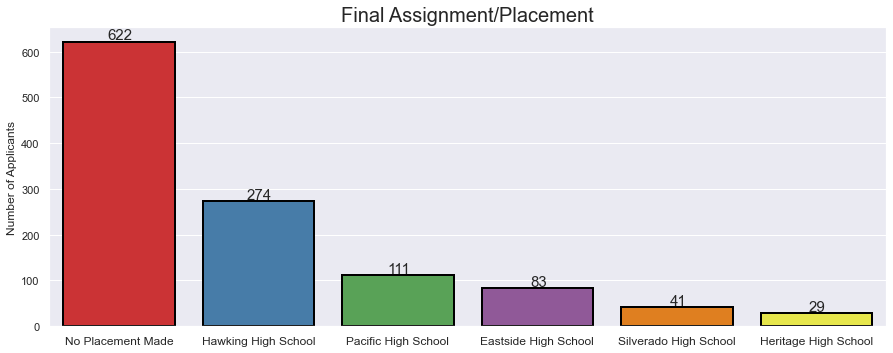

In [8]:
plt.figure(figsize=(15, 5.5))
app = sns.countplot(x=school.Assignment, data=school, edgecolor='black', linewidth=2, order = school.Assignment.value_counts().index)
for p in app.patches:
    app.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 6), textcoords = 'offset points', fontsize=15)
    app.set_ylabel('Number of Applicants')
    app.set_xlabel('')
    plt.xticks(fontsize=12)
    app.axes.set_title('Final Assignment/Placement',fontsize=20)

Extract a dataframe of the target data and export to CSV for later use

In [9]:
assignment_data = pd.DataFrame(school, columns=['Assignment', 'Final Assignment Placement'])
assignment_data.to_csv('assignment_data.csv', index=False)

## Interests Among Applicants

The survey appears to have allowed students to respond with multiple choices. Before I plot the data I will strip off redundant text.

In [10]:
school.Interests = school.Interests.str.replace(r"(\s*\(.*?\)\s*)", " ").str.strip()

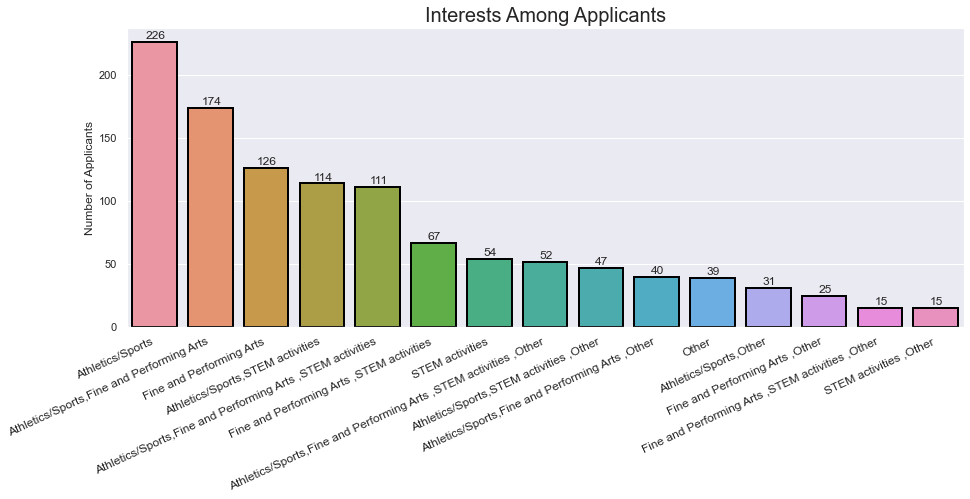

In [11]:
plt.figure(figsize=(15, 5.5))
inter = sns.countplot(x=school['Interests'], data=school, edgecolor='black', linewidth=2, order = school.Interests.value_counts().index)
for p in inter.patches:
    inter.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 6), textcoords = 'offset points')
    plt.xticks(fontsize=15, rotation=25, horizontalalignment='right')
    inter.set_ylabel('Number of Applicants')
    inter.set_xlabel('')
    plt.xticks(fontsize=12)
    inter.axes.set_title('Interests Among Applicants',fontsize=20)
plt.show()

### How did the applicants rank those schools?

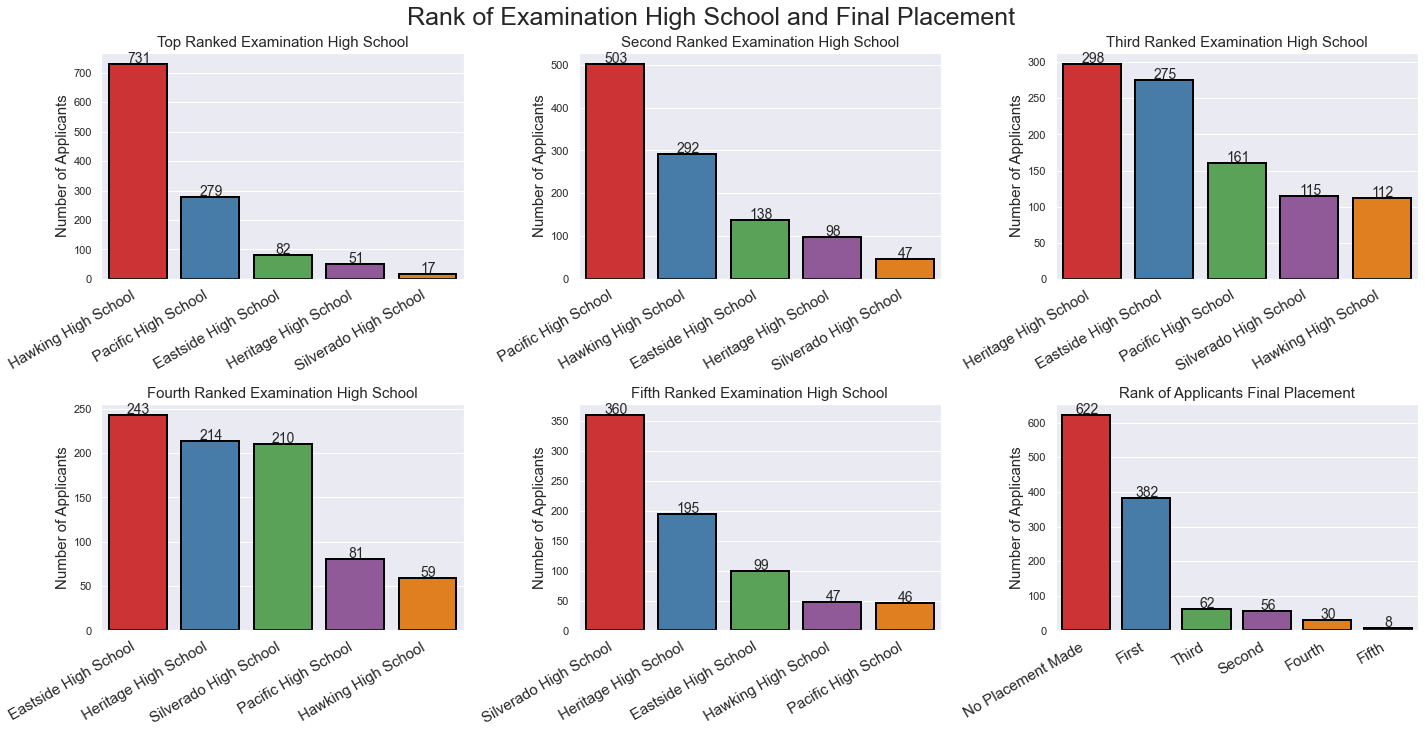

In [12]:
hist_col = ['Top Ranked Examination High School', 'Second Ranked Examination High School', 'Third Ranked Examination High School','Fourth Ranked Examination High School','Fifth Ranked Examination High School','Rank of Applicants Final Placement']

plt.figure(figsize=(20, 14))
cnt=1
for i in hist_col:
    plt.subplot(3,3,cnt)
    plt.suptitle('Rank of Examination High School and Final Placement', fontsize=25)
    rankings = sns.countplot(x=school[i], data = school, edgecolor='black', linewidth=2, order = school[i].value_counts().index)
    rankings.set_xlabel('')
    rankings.set_ylabel('Number of Applicants', fontsize=15)
    plt.title((i), fontsize=15)
    cnt=cnt+1
    for p in rankings.patches:
        rankings.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 5), textcoords = 'offset points', fontsize=14)
        plt.xticks(fontsize=15, rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

Extract a dataframe of the target data and export to CSV for later use

In [13]:
rank_data = pd.DataFrame(school, columns=['Top Ranked Examination High School', 'Second Ranked Examination High School', 'Third Ranked Examination High School','Fourth Ranked Examination High School','Fifth Ranked Examination High School', 'Rank of Applicants Final Placement'])
rank_data.to_csv('rank_data.csv', index=False)

### Where did the applicants for each school come from? 

What cities did the applicants come from?

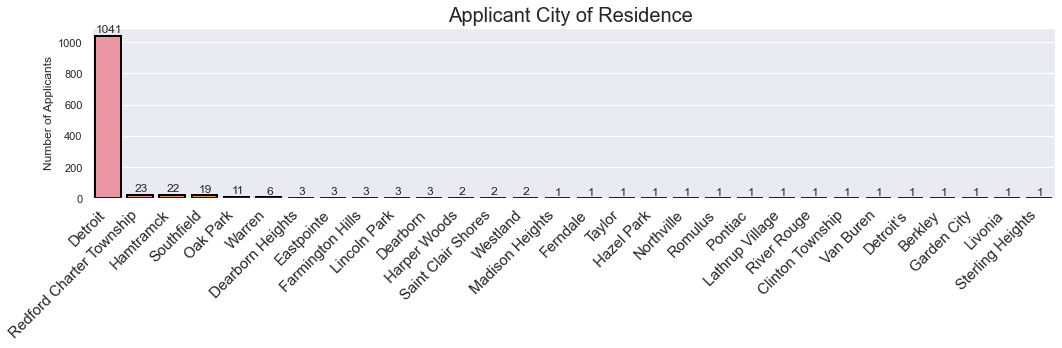

In [14]:
plt.figure(figsize=(15, 5))
city = sns.countplot(x=school['Applicant City of Residence'], data=school, edgecolor='black', linewidth=2, order = school['Applicant City of Residence'].value_counts().index)
for p in city.patches:
    city.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 6), textcoords = 'offset points')
    city.set_ylabel('Number of Applicants')
    city.set_xlabel('')
    city.axes.set_title('Applicant City of Residence ',fontsize=20)
    plt.xticks(fontsize=15, rotation=45, horizontalalignment='right')
plt.tight_layout()

Extract a dataframe of the target data and export to CSV for later use

In [15]:
city_data = pd.DataFrame(school, columns=['Applicant City of Residence'])
city_data.to_csv('city_data.csv', index=False)

#### What state did the applicants come from?

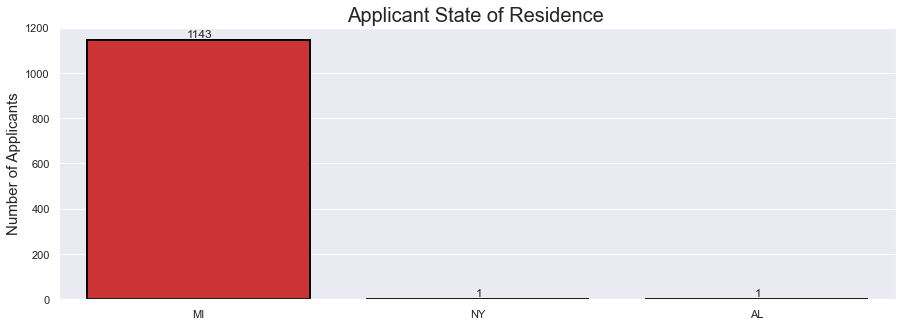

In [16]:
plt.figure(figsize=(15, 5))
state = sns.countplot(x=school['Applicant State of Residence'], data=school, edgecolor='black', linewidth=2, order = school['Applicant State of Residence'].value_counts().index)
for p in state.patches:
    state.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (1, 6), textcoords = 'offset points')
    state.set_ylabel('Number of Applicants', fontsize=15)
    state.set_xlabel('')
    state.axes.set_title('Applicant State of Residence ',fontsize=20)

Extract a dataframe of the target data and export to CSV for later use

In [21]:
state_data = pd.DataFrame(school, columns=['Applicant State of Residence'])
state_data.to_csv('state_data.csv', index=False)